# Churn model voor het bedrijf Telco

In [1]:
import pandas as pd
# klasse om data te splitsen in een leer- en testset
from sklearn.model_selection import train_test_split  
# libs voor grafieken
import seaborn as snb                                 
import matplotlib.pyplot as plt
# libs nodig om de dataPipeLine te maken
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Data verkennen

In [2]:
df = pd.read_csv("../data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 ### Verklaring kolommen

In [4]:
# customer 1 lijn of meerdere lijnen ?
print(len(df.customerID.unique()))

7043


In [5]:
# per customer 1 lijn
# gender --> geslacht
print(df.gender.unique())

['Female' 'Male']


In [6]:
# SeniorCitizen
print(df.SeniorCitizen.unique())

[0 1]


In [7]:
# Partner --> ja of nee
print(df.Partner.unique())

['Yes' 'No']


In [8]:
# Dependents --> ten laste 
print(df.Dependents.unique())

['No' 'Yes']


In [9]:
# Tenure --> aantal maanden klant
print(df.tenure.unique())

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


In [10]:
# PhoneService --> telefoon abonnenment
print(df.PhoneService.unique())

['No' 'Yes']


In [11]:
# MultipleLines --> meerdere lijnen?
print(df.MultipleLines.unique())

['No phone service' 'No' 'Yes']


In [12]:
# InternetService --> soort internet verbinding
print(df.InternetService.unique())

['DSL' 'Fiber optic' 'No']


In [13]:
# OnlineSecurity --> online beveiliging
print(df.OnlineSecurity.unique())

['No' 'Yes' 'No internet service']


In [14]:
# OnlineBackup --> online backup
print(df.OnlineBackup.unique())

['Yes' 'No' 'No internet service']


In [15]:
# DeviceProtection --> systeem beveiliging
print(df.DeviceProtection.unique())

['No' 'Yes' 'No internet service']


In [16]:
# TechSupport --> technische support
print(df.TechSupport.unique())

['No' 'Yes' 'No internet service']


In [17]:
# StreamingTV --> TV streamen
print(df.StreamingTV.unique())

['No' 'Yes' 'No internet service']


In [18]:
# StreamingMovies --> films streamen
print(df.StreamingMovies.unique())

['No' 'Yes' 'No internet service']


In [19]:
# Contract --> soort contract
print(df.Contract.unique())

['Month-to-month' 'One year' 'Two year']


In [21]:
# PaperlessBilling --> electronische factuur ?
print(len(df.PaperlessBilling))
print(df.PaperlessBilling.unique()

SyntaxError: unexpected EOF while parsing (3249014463.py, line 3)

In [22]:
# PaymentMethod --> betaalmethode
print(df.PaymentMethod.unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
# MonthlyCharges
print(df.MonthlyCharges.unique())

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


In [24]:
# TotalCharges !!!!strings!!!!
print(df.TotalCharges.unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [25]:
# Churn --> klant weggelopen ?
print(df.Churn.unique())

['No' 'Yes']


In [26]:
# Kolom TotalCharges zijn strings, maar zouden getallen moeten zijn
# sommigen bevatten een spatie
print(df[df.TotalCharges == ' '])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [27]:
# omzetten lege strings naar '0'
df.TotalCharges = df.TotalCharges.str.replace(' ','0')
# nu omzetten naar float
df.TotalCharges = df.TotalCharges.astype('float')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Maken van train set en test set

In [29]:
train_set,test_set = train_test_split(df,test_size=0.3,random_state=42)
# random_state is randomseed voor de random functie
print('aantal entries in train_set:', len(train_set))
print('aantal entries in test_set: ', len(test_set))
print('stukje inhoud train_set:')
train_set.head()

aantal entries in train_set: 4930
aantal entries in test_set:  2113
stukje inhoud train_set:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1695,4906-ZHGPK,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,70.70,3770.00,No
1095,7439-DKZTW,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,No
3889,2592-HODOV,Male,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,259.65,No
3667,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,No
2902,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90,No


## Patronen in churn detecteren aan de hand van visuele analyse

### Procentueel aantal churners

In [30]:
yes_no_churn = train_set.Churn.value_counts()
print(yes_no_churn)

No     3635
Yes    1295
Name: Churn, dtype: int64


In [31]:
# ophalen van No, Yes uit serie (=index van serie)
labels = list(yes_no_churn.index)
# ophalen van de waarden horende bij Yes en No
values = list(yes_no_churn.values)
print("labels:",labels,"values:",values)

labels: ['No', 'Yes'] values: [3635, 1295]


In [32]:
values_p = [values[0]*100/sum(values),values[1]*100/sum(values)]
print(values_p)

[73.73225152129818, 26.267748478701826]


([<matplotlib.patches.Wedge at 0x7f6dce569b20>,
 [Text(-0.7462304484696153, 0.8081708468986226, 'No'),
  Text(0.7462305998024334, -0.8081707071643345, 'Yes')],
 [Text(-0.4070347900743356, 0.4408204619447032, '73.73%'),
  Text(0.40703487261950916, -0.44082038572600063, '26.27%')])

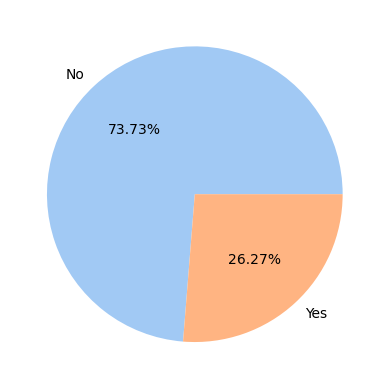

In [33]:
# kiezen van een kleurenpalet waaruit eerste 5 elementen genomen worden
colors = snb.color_palette('pastel')[0:5]
plt.pie(values_p,labels=labels,colors=colors,autopct='%.2f%%')

### Invloed van geslacht op churn

<Axes: xlabel='Churn', ylabel='count'>

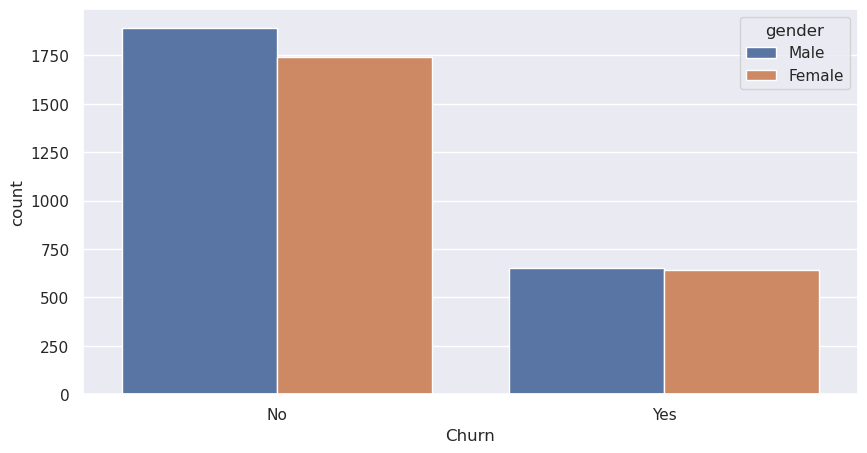

In [34]:
snb.set(rc={'figure.figsize':(10,5)})
snb.countplot(x=train_set.Churn,data=train_set,hue=train_set.gender)

### Invloed van gepensioneerd zijn op churn

<Axes: xlabel='Churn', ylabel='count'>

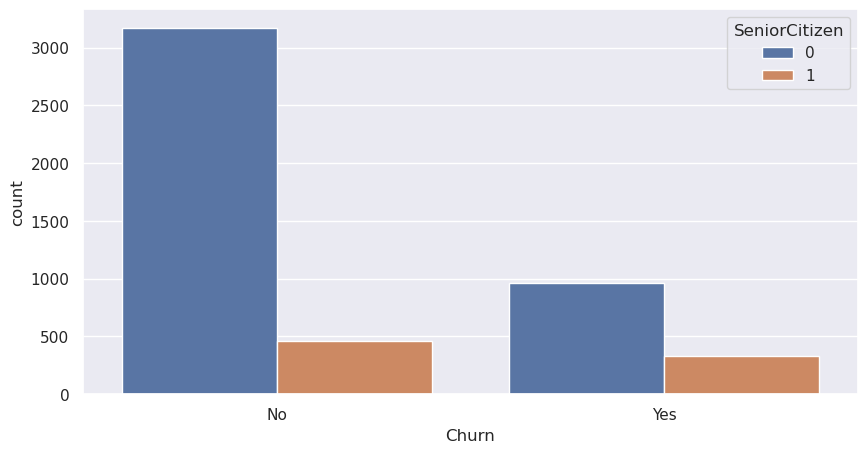

In [35]:
snb.countplot(x=train_set.Churn,data=train_set,hue=train_set.SeniorCitizen)

### Invloed van al dan niet een partner op churn 

<Axes: xlabel='Churn', ylabel='count'>

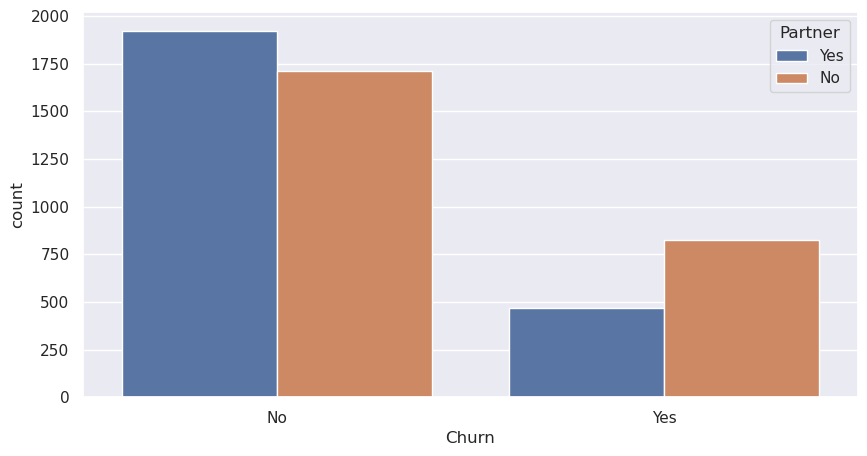

In [36]:
snb.countplot(x=train_set.Churn,data=train_set,hue=train_set.Partner)

# Invloed van aantal maanden klant op churn 

<Axes: xlabel='tenure', ylabel='count'>

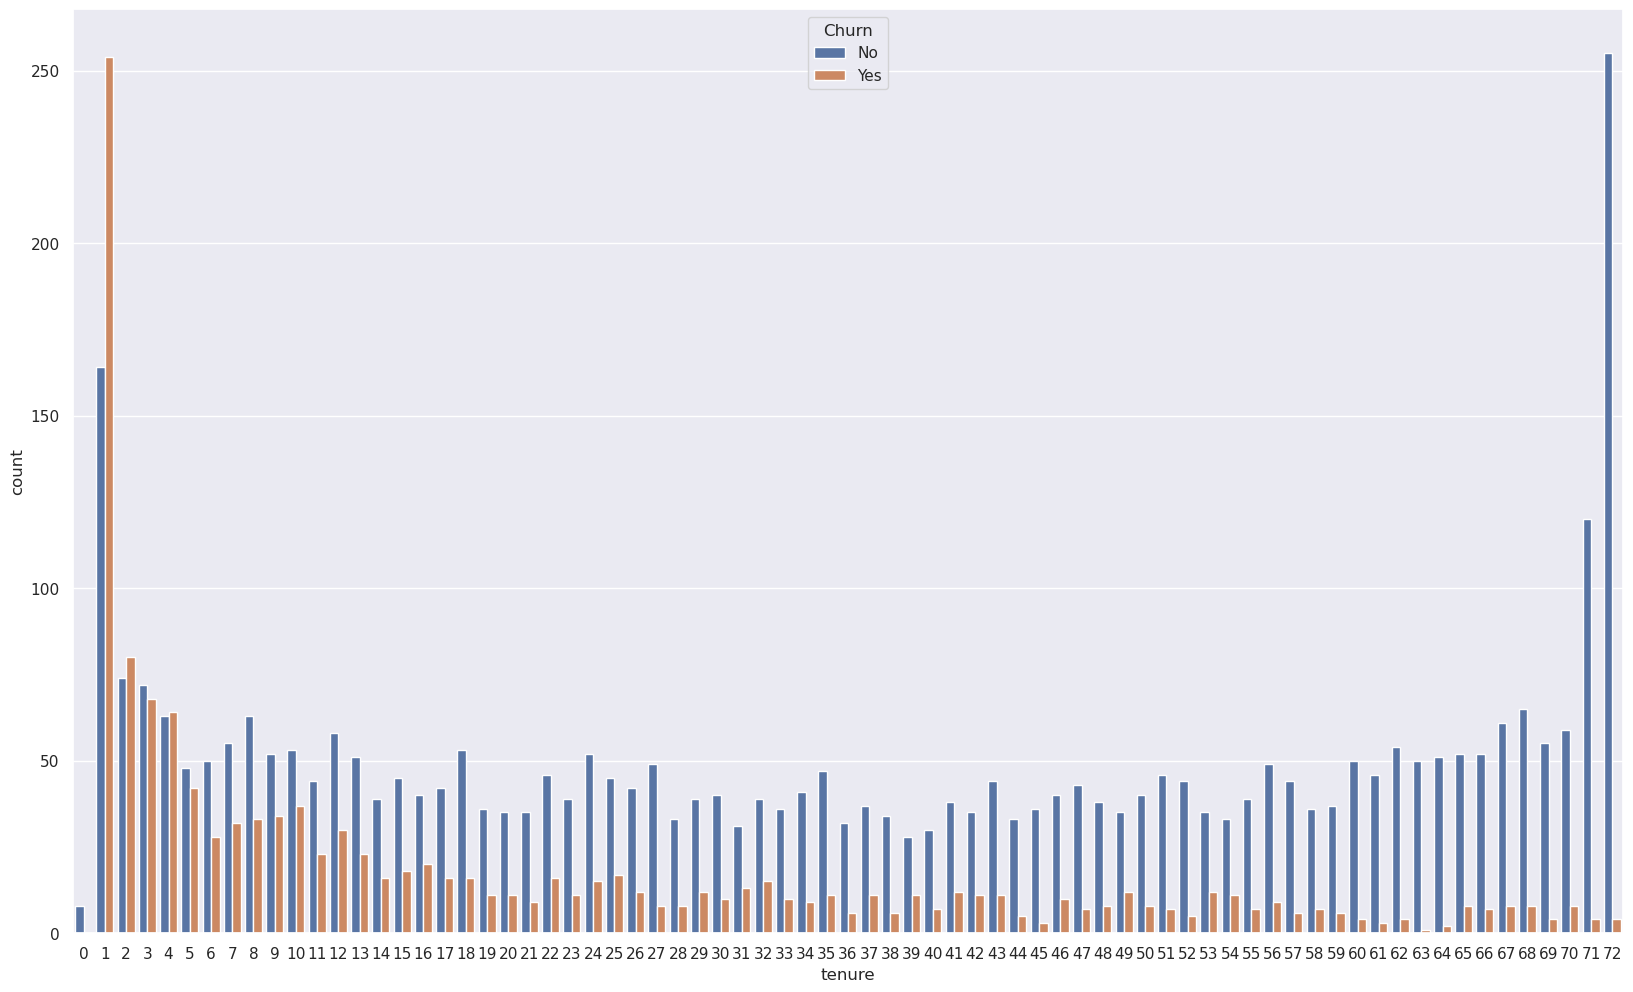

In [37]:
snb.set(rc={'figure.figsize':(20,12)})
snb.countplot(x=train_set.tenure,data=train_set,hue=train_set.Churn)

### Invloed maandelijks te betalen bedrag op churn

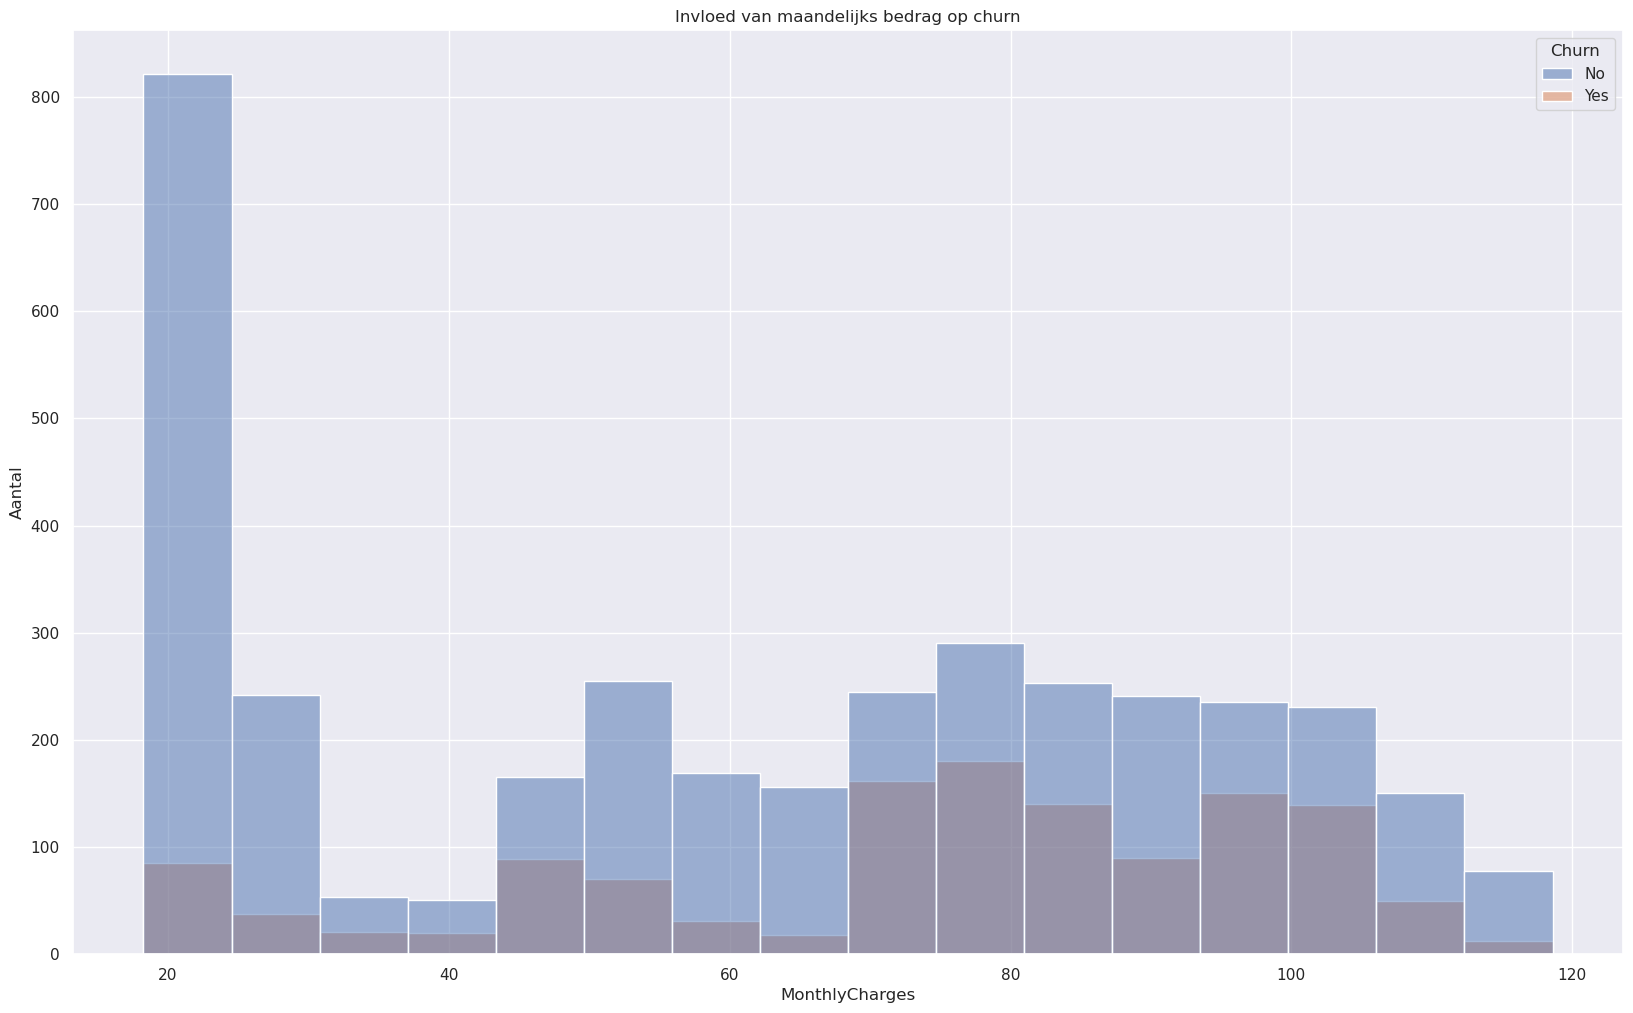

In [38]:
#snb.countplot(x=train_set.MonthlyCharges,data=train_set,hue=train_set.Churn)
fig = snb.histplot(x=train_set.MonthlyCharges,data=train_set,hue=train_set.Churn)
# naam y-as veranderen
fig.set_ylabel('Aantal')
# naam titel veranderen
fig.set_title('Invloed van maandelijks bedrag op churn')
# pointer naar grafiek ophalen
fig_tosave = fig.get_figure()
# grafiek opslaan
fig_tosave.savefig('invloed_maandbedrag_op_churn.png')

### Invloed soort internet connectie op churn 

<Axes: xlabel='Churn', ylabel='count'>

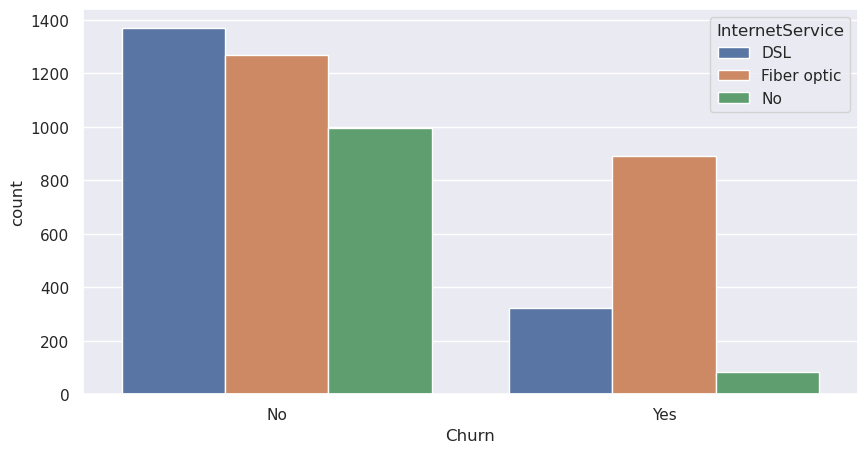

In [39]:
snb.set(rc={'figure.figsize':(10,5)})
snb.countplot(x=train_set.Churn,data=train_set,hue=train_set.InternetService)

### Invloed van tech support op churn

<Axes: xlabel='Churn', ylabel='count'>

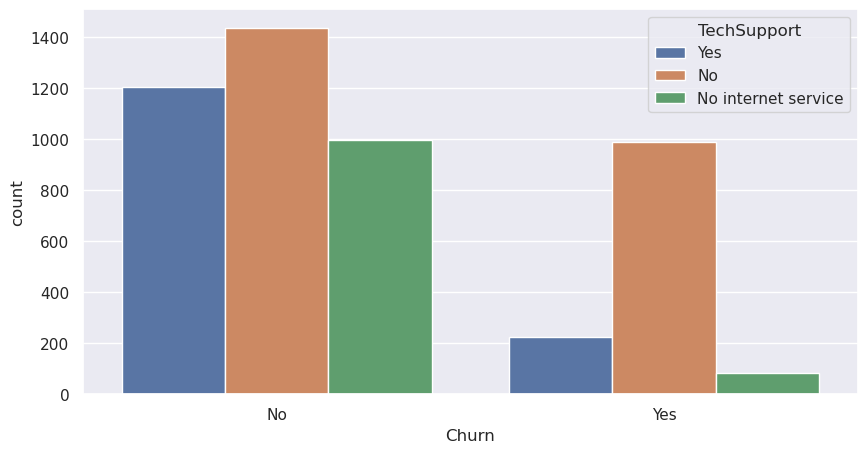

In [40]:
snb.countplot(x=train_set.Churn,data=train_set,hue=train_set.TechSupport)

### Invloed van personen ten laste op churn 

<Axes: xlabel='Churn', ylabel='count'>

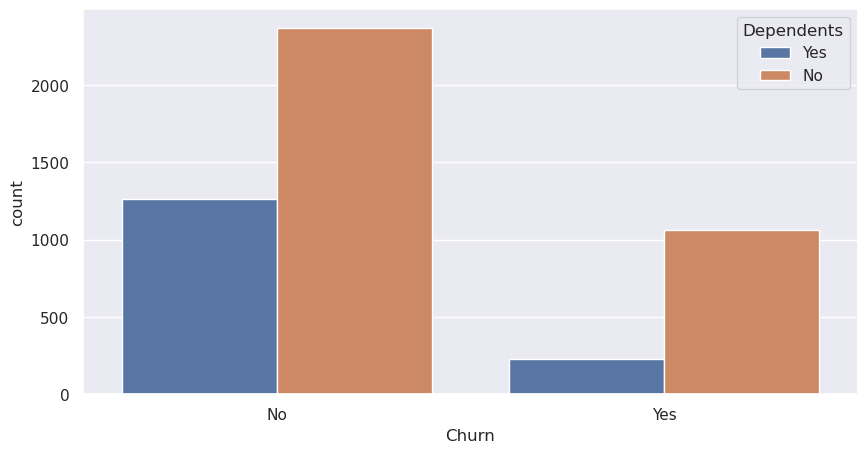

In [41]:
snb.countplot(x=train_set.Churn,data=train_set,hue=train_set.Dependents)

### Invloed van telefoon service op churn

<Axes: xlabel='Churn', ylabel='count'>

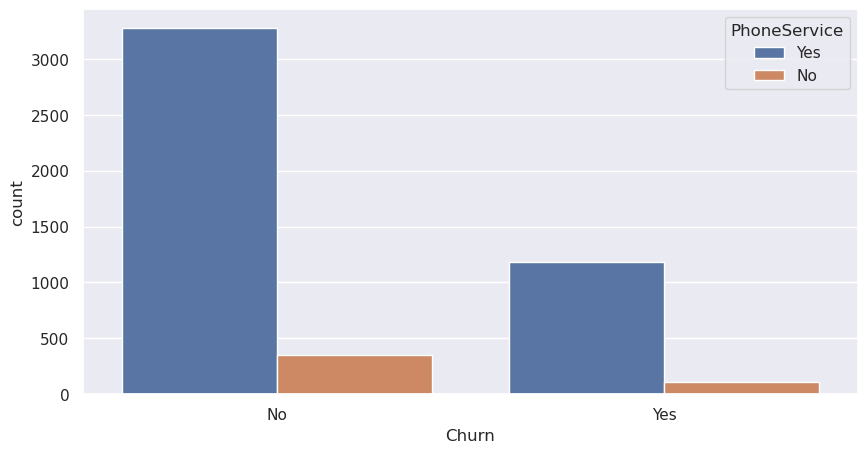

In [42]:
snb.countplot(x=train_set.Churn,data=train_set,hue=train_set.PhoneService)

## Maken van de DataPipeLine

In [43]:
cols_to_del = ['customerID']  # kolommen om te verwijderen
cols = train_set.columns
num_features = ['tenure','MonthlyCharges','TotalCharges']
target = 'Churn'
cat_features = []  # voor de niet numerieke velden beginnen met lege lijst
for c in cols:     # alle kolommen overlopen
    if c in cols_to_del:   # zit in kolommen te verwijderen, volgende stap
        continue
    if c in num_features:  # zit in numverieke kolommen, volgende stap
        continue
    if c == target:        # is target, volgende stap
        continue
    cat_features.append(c) # toevoegen aan cat_features
print(cat_features)
cols_change_zero_to_nan = ['TotalCharges']

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [44]:
def preprocessData(data,cols_change_0,cols_del,cols_num,cols_cat,target,dataPipeLine=None):
    
    # data opkuisen
    try:
        # kolommen waarin nullen zijn. Nullen vervangen door NaN (Not a Number)
        for c in cols_change_0:
            data[c] = data[c].replace({'0':np.nan, ' ':np.nan, 0:np.nan})
        # drop alle rijen die NaNs bevatten
        data.dropna()
        # kolommen die overbodig zijn verwijderen
        data.drop(columns=cols_del)
    except:
        print('probleem met droppen van kolommen of niet geldige data.')
    # bepalen target en features
    y = data[target] 
    X = data.drop(columns=[target])  # features
    
    if dataPipeLine is None:
        # transformatie voor de num features
        scaler = MinMaxScaler(feature_range=(0,1))
        # transformatie voor niet numerieke features
        # OneHotEncoder wordt gebruikt bij features die geen bepaalde rangorde hebben.
        # drop='if_binary' zorgt ervoor dat een kolom met 2 waarden dezelfde kolom blijft die de waarde 1 en 0
        # zal bevatten vb no -> 0 en yes -> 1
        # kolommen met meer dan 2 waarden worden uitgebreid tot meerdere kolommen afhankelijk van het
        # aantal waarden
        o_enc = OneHotEncoder(drop='if_binary')    
        # Hier worden alle transformaties samen gebracht. Iedere transformatie is een tuple met 3 elementen :
        # 1ste = naam, 2de = transformatie, 3de = op welke features
        col_trans = ColumnTransformer(transformers=[('num',scaler,cols_num),('cat',o_enc,cols_cat)])
        # Maken van de PipeLine
        process = Pipeline(steps=[('coltrans',col_trans)])
        # De uiteidelijke transformatie
        X_res = process.fit_transform(X)
        # met drop_first blijft y 1 kolom en wordt target omgezet (yes/no)
        y = pd.get_dummies(y,drop_first=True)
        return X_res,y,process
    
    else:  # transformatie is al geleerd, dus enkel nog uitvoeren
        X_res = dataPipeLine.transform(X)
        y = pd.get_dummies(y,drop_first=True)
        return X_res,y,process
     

### Leer data door de dataPipeLine sturen

In [45]:
dataprocess = None
X,y,dataprocess = preprocessData(train_set,cols_change_zero_to_nan,cols_to_del,num_features,cat_features,
                                 target,dataprocess)
print("Getransformeerde features:")
print(X)
print("Getransformeerde target:")
print(y[:10])
print('DataPipeLine')
print(dataprocess)

probleem met droppen van kolommen of niet geldige data.
Getransformeerde features:
[[0.75       0.52267065 0.43409175 ... 0.         1.         0.        ]
 [0.01388889 0.62082711 0.00927482 ... 0.         1.         0.        ]
 [0.18055556 0.01046338 0.02989706 ... 1.         0.         0.        ]
 ...
 [0.16666667 0.02889885 0.03523973 ... 0.         1.         0.        ]
 [0.16666667 0.80916791 0.13818971 ... 0.         1.         0.        ]
 [0.36111111 0.01544594 0.05265521 ... 1.         0.         0.        ]]
Getransformeerde target:
      Yes
1695    0
1095    0
3889    0
3667    0
2902    0
1630    0
4294    0
1881    0
4710    0
1612    1
DataPipeLine
Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                  